# Imports

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# create figures directory
import os

directory_path = 'figures'
if not os.path.exists(directory_path):
    # If not, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'figures' created successfully.


# Plot aesthetics

In [3]:
matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

%matplotlib inline

In [4]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# AXIS TICK COLORS
AXIS_TICK_COLORS = 'black'

# lighter teal -- EQ
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# COMPARTMENTS COLOR -- Non-neural, Coelomocyte, Glia, Neuron
COMPARTMENTS_COLOR = ['#c63287','#ff99da','#693996','#fdcd0f']

# Load Data

In [5]:
# load data
ad_url = "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/WholeData.h5ad" 
ad_glia_url = "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/GliaOnly.h5ad" 

adata = sc.read('../../data/WholeData.h5ad', backup_url=ad_url)
adata_glia = sc.read('../../data/GliaOnly.h5ad', backup_url=ad_glia_url)

# SFig 4A -- Pan Glial Data

In [6]:
# excluded clusters -- and visualize the data
EXCLUDE_COMP = adata.obs.loc[:,'cluster_comp'].str.contains('Glia-like non-neural')
EXCLUDE_CLUSTERS = list(map(lambda cluster: cluster.split(' - ')[0], adata.obs.loc[EXCLUDE_COMP,'cluster_comp'].unique().tolist()))

# get the probability estimates data from the uns
glial_probabilities = adata.uns['FiguresData_PanGlial_Selection_Results']['Glial_Probability_Estimates'].copy()
adata.obs = pd.concat([adata.obs, glial_probabilities.iloc[:,:2]], axis=1)

# subset the data
adata_sub = adata[~adata.obs['leiden_postBC'].isin(EXCLUDE_CLUSTERS),:].copy()

In [7]:
# set the color of class labels -- ['Glia','Non-Glia']
adata_sub.uns['class_labels_colors'] = ['#693996','#bdde7a']

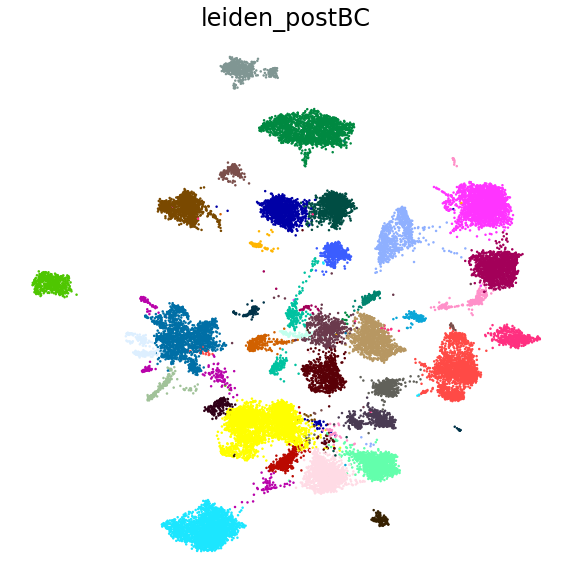

In [8]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata_sub,
        color=['leiden_postBC'],
        frameon=False,
        size=DOT_SIZE,
        ncols=4,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='All_Data_PanGlia_Data.svg',
    )

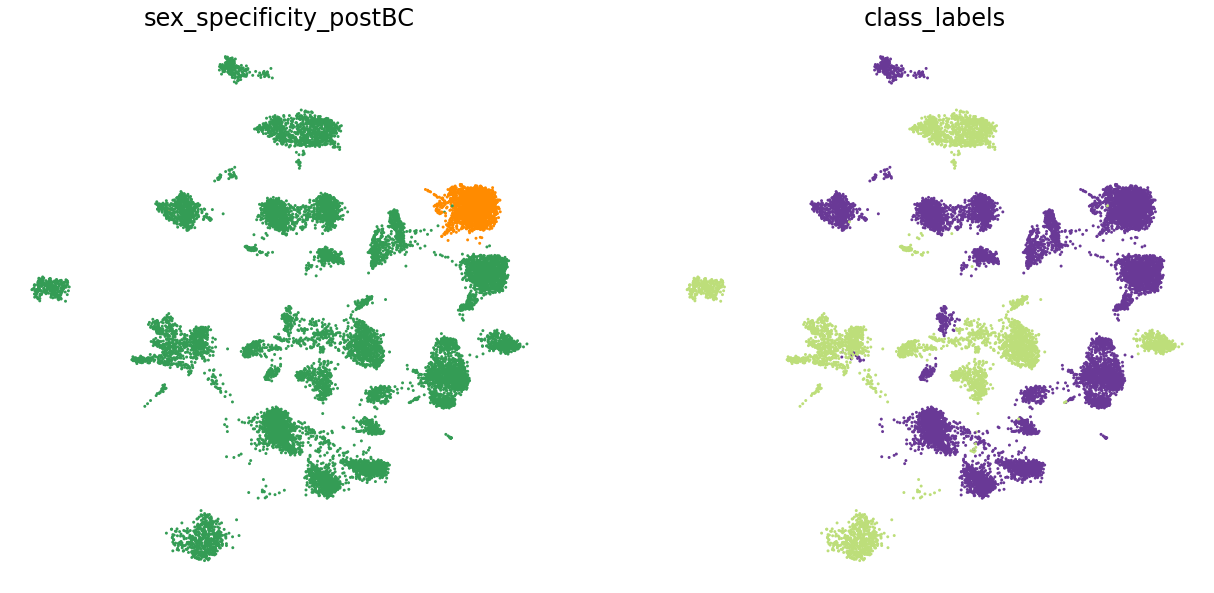

In [9]:
# herm data
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata_sub[(adata_sub.obs['sex'] == 'Hermaphrodite') & (adata_sub.obs['sex_specificity_postBC'].isin(['Both','Herm'])),:],
        color=['sex_specificity_postBC', 'class_labels'],
        frameon=False,
        size=DOT_SIZE + 10,
        ncols=3,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='Herm_Data_PanGlia_Data.svg',
    )

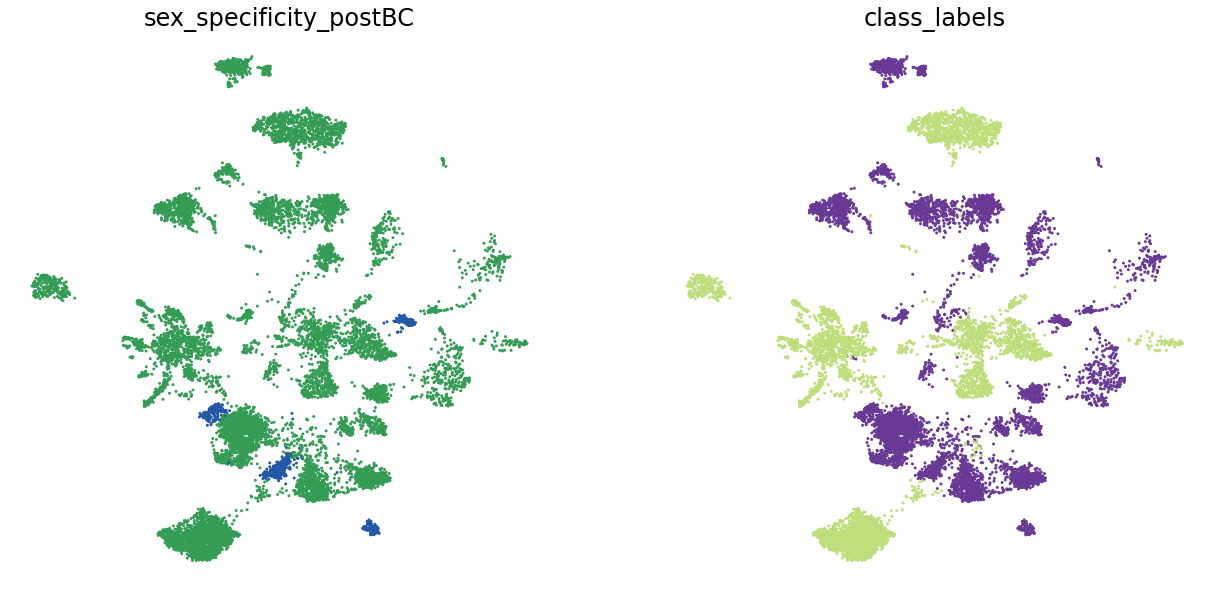

In [10]:
# male data
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata_sub[(adata_sub.obs['sex'] == 'Male') & (adata_sub.obs['sex_specificity_postBC'].isin(['Both','Male'])),:],
        color=['sex_specificity_postBC', 'class_labels'],
        frameon=False,
        size=DOT_SIZE + 10,
        ncols=3,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='Male_Data_PanGlia_Data.svg',
    )

# SFig 4B -- Glial Probability Estimates

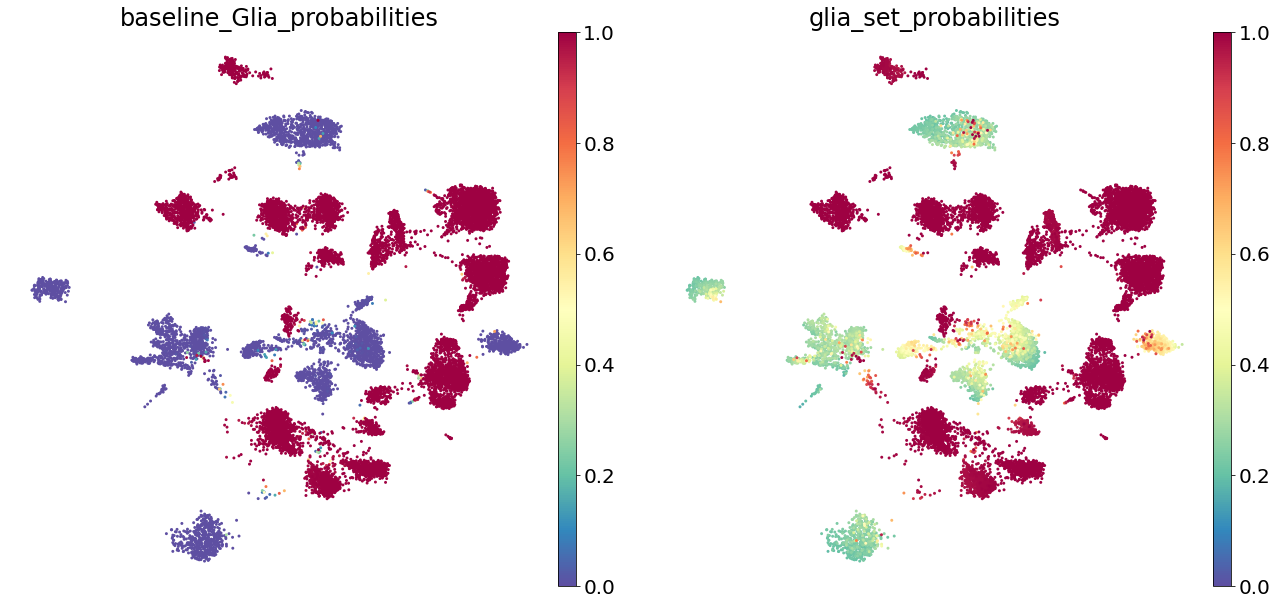

In [11]:
# herm glial probability
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata_sub[(adata_sub.obs['sex'] == 'Hermaphrodite') & (adata_sub.obs['sex_specificity_postBC'].isin(['Both','Herm'])),:],
        color=['baseline_Glia_probabilities','glia_set_probabilities'],
        frameon=False,
        size=DOT_SIZE + 10,
        ncols=3,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='Herm_Data_PanGlia_Data_GliaProbability.svg',
        vmax=1,
        vmin=0
    )

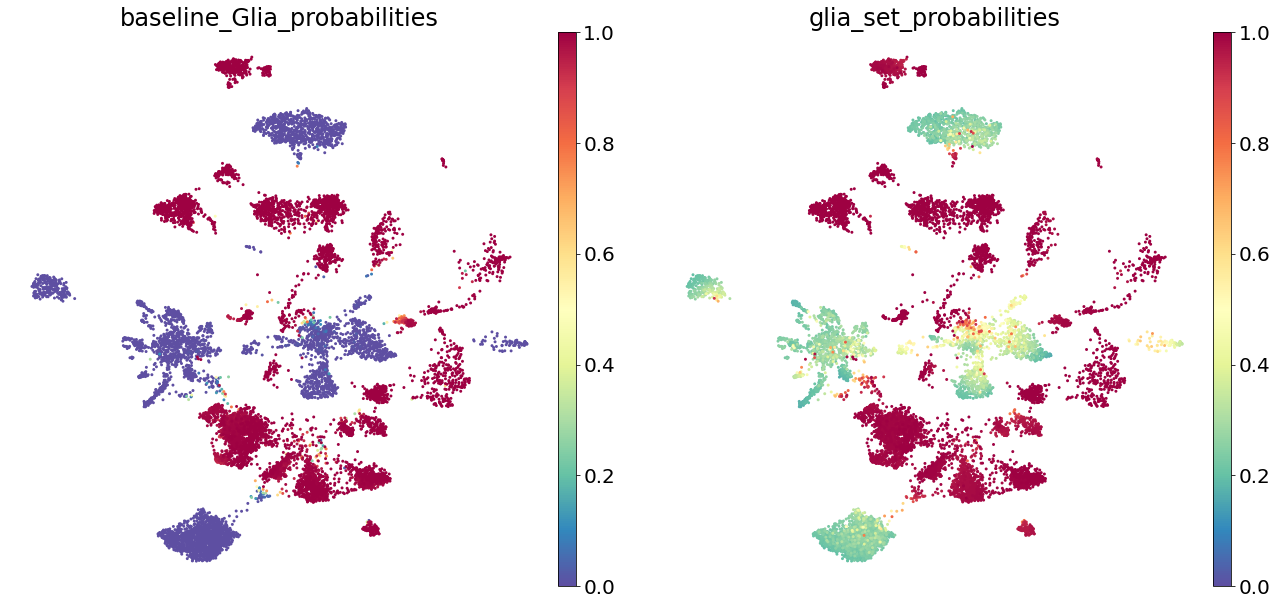

In [12]:
# male data
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata_sub[(adata_sub.obs['sex'] == 'Male') & (adata_sub.obs['sex_specificity_postBC'].isin(['Both','Male'])),:],
        color=['baseline_Glia_probabilities','glia_set_probabilities'],
        frameon=False,
        size=DOT_SIZE + 10,
        ncols=3,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='Male_Data_PanGlia_Data_GliaProbability.svg',
        vmax=1,
        vmin=0
    )

# SFig 4C -- Identified Genes

In [13]:
identified_panglial_genes = adata.uns['FiguresData_PanGlial_Selection_Results']['Identified_Genes']

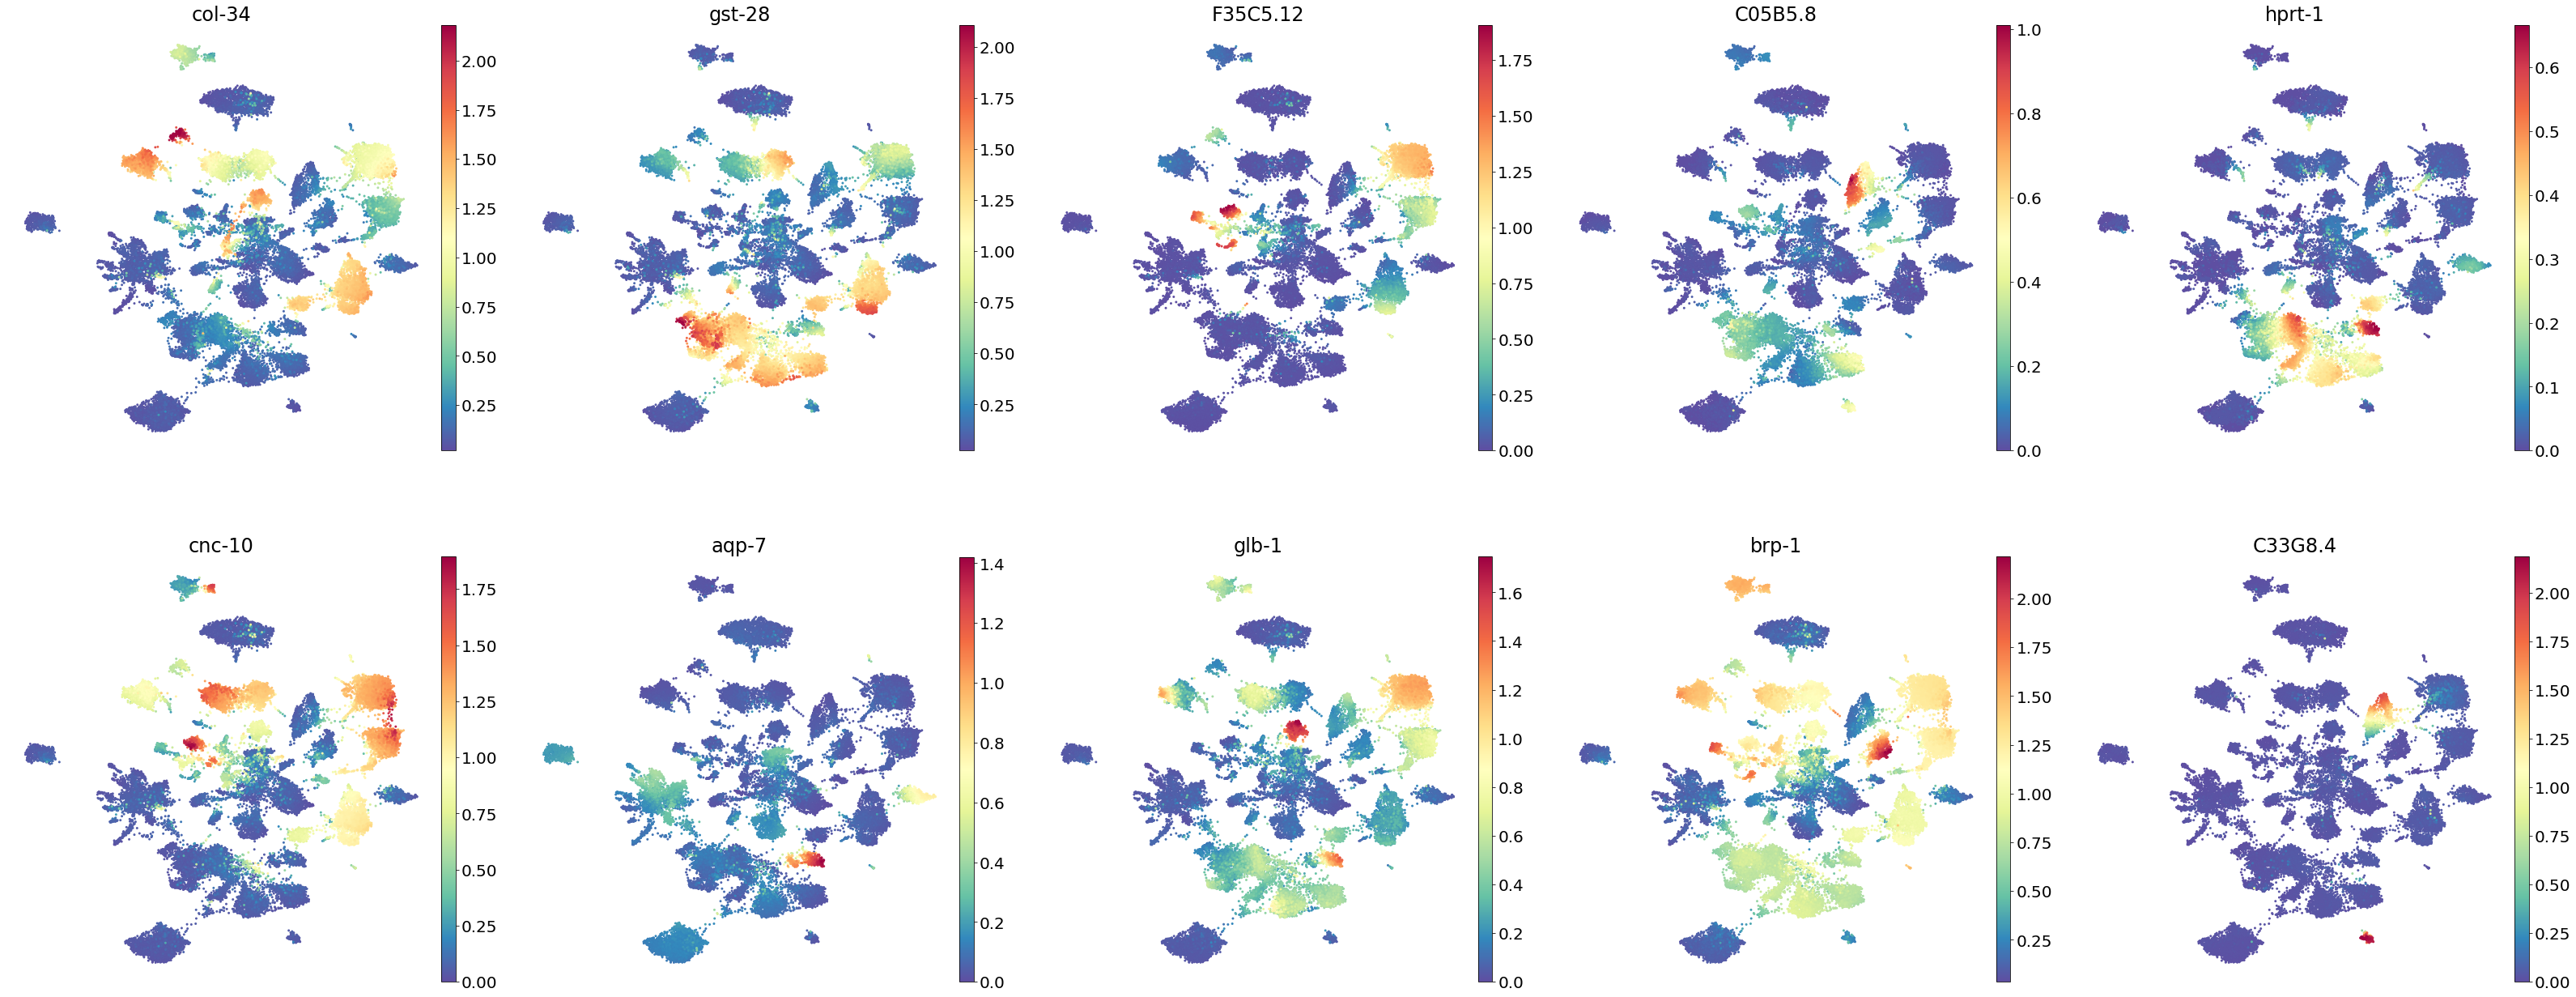

In [14]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size':20}):
    sc.pl.umap(
        adata,
        color=identified_panglial_genes,
        frameon=False,
        size=DOT_SIZE + 10,
        ncols=5,
        legend_loc=None,
        na_color='#f2f0f0',
        # save='Male_Data_PanGlia_Data_GliaProbability.svg',
        layer='magic_imputed_postBC'
    )

# SFig 4D -- Minimal Set Summaries - Probability Estimates Per Cluster

In [15]:
# get the minset result in the anndata
glia_minset_summary = adata.uns['FiguresData_PanGlial_Selection_Results']['Minimal_Set_Results']

In [16]:
# plotting function
def add_scatter_trace(fig, df, label, y_offset):
    df_label = df[df['min_set_label'] == label]
    fig.add_trace(go.Scatter(
        # x=y_offset + np.random.rand(len(df_label)) * 0.4,  # Adding jitter to x-values
        x = y_offset + np.random.uniform(low=-0.5, high=0.5, size=len(df_label)) * 0.45, # much better implementation of jitter
        y=df_label['mean_probability_estimates'],  # Y-values are the mean_probability_estimates
        mode='markers',
        marker=dict(
            size=9,
            symbol='diamond',
            color=df_label['cluster_colors'],
            opacity=0.6,
        ),
        name=label,
        text=df_label['cluster'],
    ))

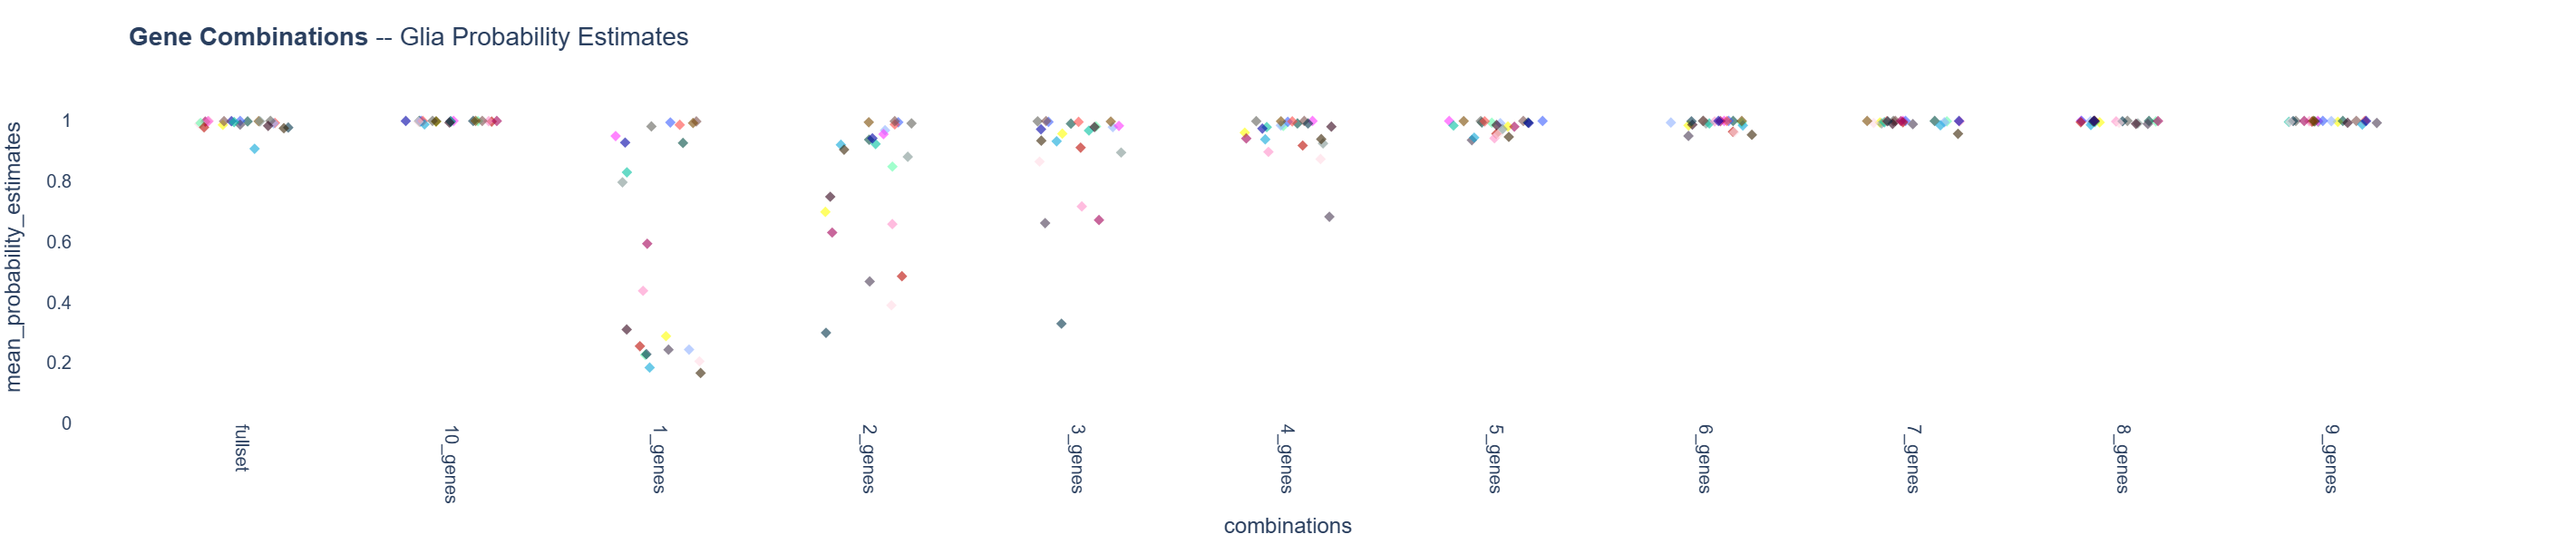

In [17]:
fig = go.Figure()

# ordering -- each element in this list is a unique element in the minset
# summary dataframe
unique_labels = ['fullset','10_genes'] + [f'{i}_genes' for i in range(1,11)]

# N = len(minimalset_results)
y_offsets = np.arange(len(glia_minset_summary.min_set_label.unique()))

for label, y_offset in zip(unique_labels, y_offsets):
    add_scatter_trace(fig, glia_minset_summary, label, y_offset)

fig.update_layout( 
    coloraxis_showscale=False, 
    plot_bgcolor='rgba(0,0,0,0)',
    width=1200,
    height=600, title='<b>Gene Combinations</b> -- Glia Probability Estimates',
    font=dict(family='Arial', size=20),
    showlegend=False

)
fig.update_traces(marker_showscale=False)
fig.update_yaxes(title='mean_probability_estimates', range=[0,1.1])  # Update y-axis title & set the range
fig.update_xaxes(title='combinations', tickvals=y_offsets, ticktext=unique_labels, tickangle=90)
# fig.write_image(file='fig_outputs/PanGlia_ProbestSummary.svg', scale=3.0)
fig.show()

# SFig 4E -- 6 Gene Combination on the Calico Aging Atlas (Day 1 Hermaphrodites)

In [18]:
# load in the log normalized dataset
ad_aging_url =  "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/ad_worm_aging_normalized_logtsfm.h5ad" 

adata_roux = sc.read('calico_data/ad_worm_aging_normalized_logtsfm.h5ad', backup_url=ad_aging_url)
adata_roux

AnnData object with n_obs × n_vars = 47423 × 20305
    obs: 'n_counts', 'n_genes', 'timepoint', 'annotate_name', 'Cell_type', 'TissueType'
    var: 'gene_ids', 'gene_names', 'gene_class', 'n_counts', 'n_cells'
    uns: 'Cell_type_colors', 'annotate_name_colors', 'log1p', 'timepoint_colors'
    obsm: 'X_umap', 'scvi'
    layers: 'denoised'

In [19]:
# create the data to plot
# for each group -- filter the adata.obs dataframe for the following indices -- store the results in a list to be concatented in the end 
df_obs = adata_roux.obs.copy()
gene_targets = adata.uns['FiguresData_PanGlial_Selection_Results']['Sequential_Combo']['6_genes']
compute_mean=True
list_df = []

for timepoint, cluster in tqdm.tqdm(df_obs.groupby(['timepoint','Cell_type']).count().index, total=1080, desc='Gathering Expressions'):
    # check if we can query the following combination
    try:
        # subset the data set with respect to time point and cell type
        adata_filter = adata_roux[(adata_roux.obs['timepoint'] == timepoint) & (adata_roux.obs['Cell_type'] == cluster),gene_targets].copy()
        
        # create a dataframe and compute the gene mean/median expression of specified gene targets along
        if compute_mean:
            meta_df = pd.DataFrame(adata_filter.X.copy().mean(axis=0), columns=gene_targets, index=[f'{cluster}_{timepoint}'])
        else:
            exp_df_median = pd.DataFrame(adata_gileter.X.copy(), index=adata_filter.obs_names, columns=adata_filter.var_names)
            meta_df = pd.DataFrame(exp_df_median.median(axis=0), columns=adata_filter.var_names, index=[f'{cluster}_{timepoint}'])
        
        # add metadata information -- timepoint and Cell_type -- Cell_type info will be use to map
        # clusters to their respective tissue type later
        meta_df.loc[:,'timepoint'] = timepoint
        meta_df.loc[:,'Cell_type'] = cluster
        
        # add the dataframe to the list_df
        list_df.append(meta_df)
    except:
        # if the subsetting fails above to subset the data from -- fill it with zero
        metalt_df = pd.DataFrame(0.0, index=[f'{cluster}_{timepoint}'], columns=gene_targets)
        metalt_df.loc[:,'timepoint'] = timepoint
        metalt_df.loc[:,'Cell_type'] = cluster
        
        # add it to the list_df
        list_df.append(metalt_df)

        
# concatenate the data frames in to one master dataframe and add -- add TissueType annotation
concat_df = pd.concat(list_df)
concat_df.loc[:,'TissueType'] = concat_df.loc[:,'Cell_type'].map(dict(adata_roux.obs.loc[:,['Cell_type','TissueType']].values))

# order the 180 unique clusters in the dataframe
category_order = []
compartments = concat_df.loc[concat_df['timepoint'] == 'd1',:].groupby('TissueType').groups.keys()
for comp in compartments:
    comp_contents = concat_df.loc[concat_df['timepoint'] == 'd1',:].groupby('TissueType').get_group(comp).loc[:,'Cell_type'].unique().tolist()
    category_order += comp_contents

Gathering Expressions: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:06<00:00, 164.35it/s]


In [20]:
def calico_plot_gene_sets(dataframe, timepoint, category_order, colormap='Purples', save_path=None):
    '''
        Custom Function to plot our genes in the Calico Data
    '''
    
    # add a color label to the concatenated data frame
    tissue_lut = dict(zip(dataframe['TissueType'].unique(), ['salmon', 'palegreen', 'lavender', 'cornflowerblue', 'orange']))
    dataframe.loc[:, 'tissue_color'] = dataframe['TissueType'].map(tissue_lut)

    # Filter and reorder the dataframe using category order
    filtered_samples = dataframe.loc[dataframe['timepoint'] == timepoint, :].set_index('Cell_type').loc[category_order, :].copy()

    # Map the compartments to their corresponding colors
    tissue_colormap = dict(zip(filtered_samples.loc[:, 'tissue_color'].index, filtered_samples.loc[:, 'tissue_color']))

    # Plot the heatmap
    heatmap = sns.clustermap(
        filtered_samples.iloc[:, :6].T, cmap=colormap,
        row_cluster=False,
        col_colors=filtered_samples.index.map(tissue_colormap),
        figsize=(40, 8),
        linewidth=0.005,
        dendrogram_ratio=0.09,
        col_cluster=False,
        linecolor='white',
        vmax=4,
        xticklabels=True,
        cbar_pos=None
    )
    heatmap.ax_heatmap.set_xlabel('')
    heatmap.ax_heatmap.set_yticklabels(heatmap.ax_heatmap.get_ymajorticklabels(), fontsize=30, rotation=0)
    heatmap.ax_heatmap.axes.tick_params(axis='both', which='both', length=0.01)

    if save_path:
        heatmap.savefig(f'{save_path}.png', bbox_inches='tight')
        heatmap.savefig(f'{save_path}.svg', bbox_inches='tight')
    plt.show()

timepoint:d1


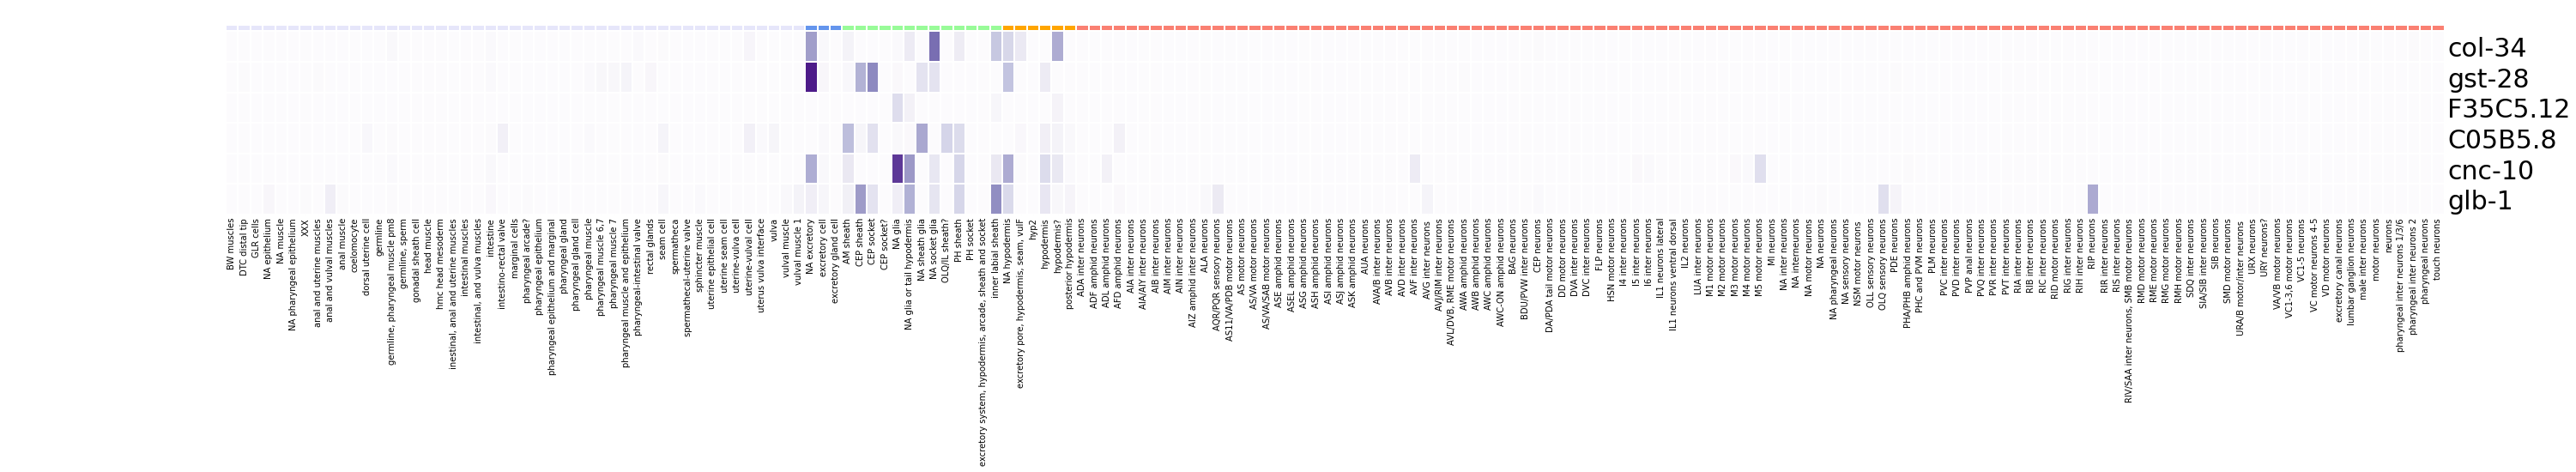

timepoint:d3


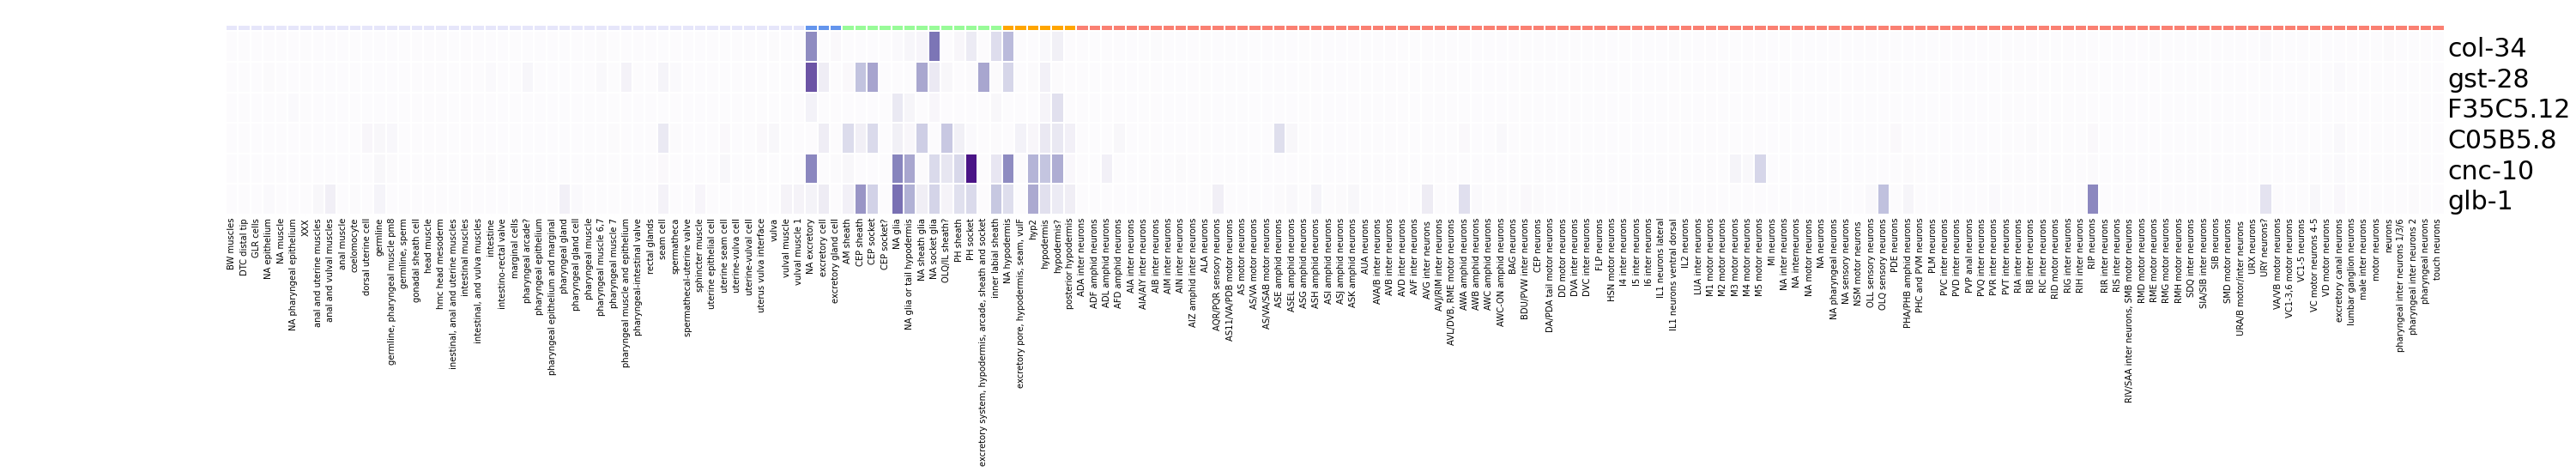

timepoint:d5


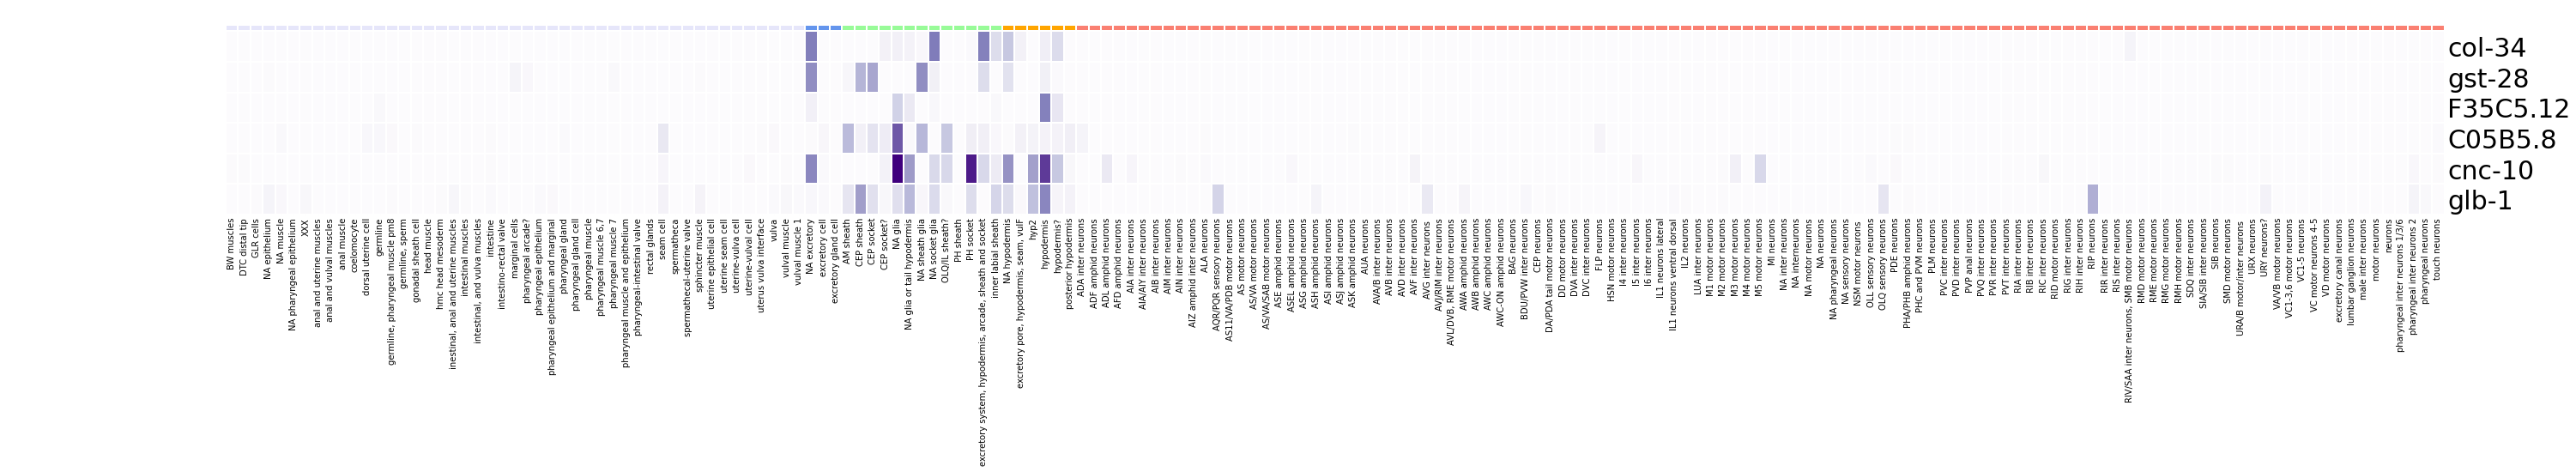

timepoint:d8


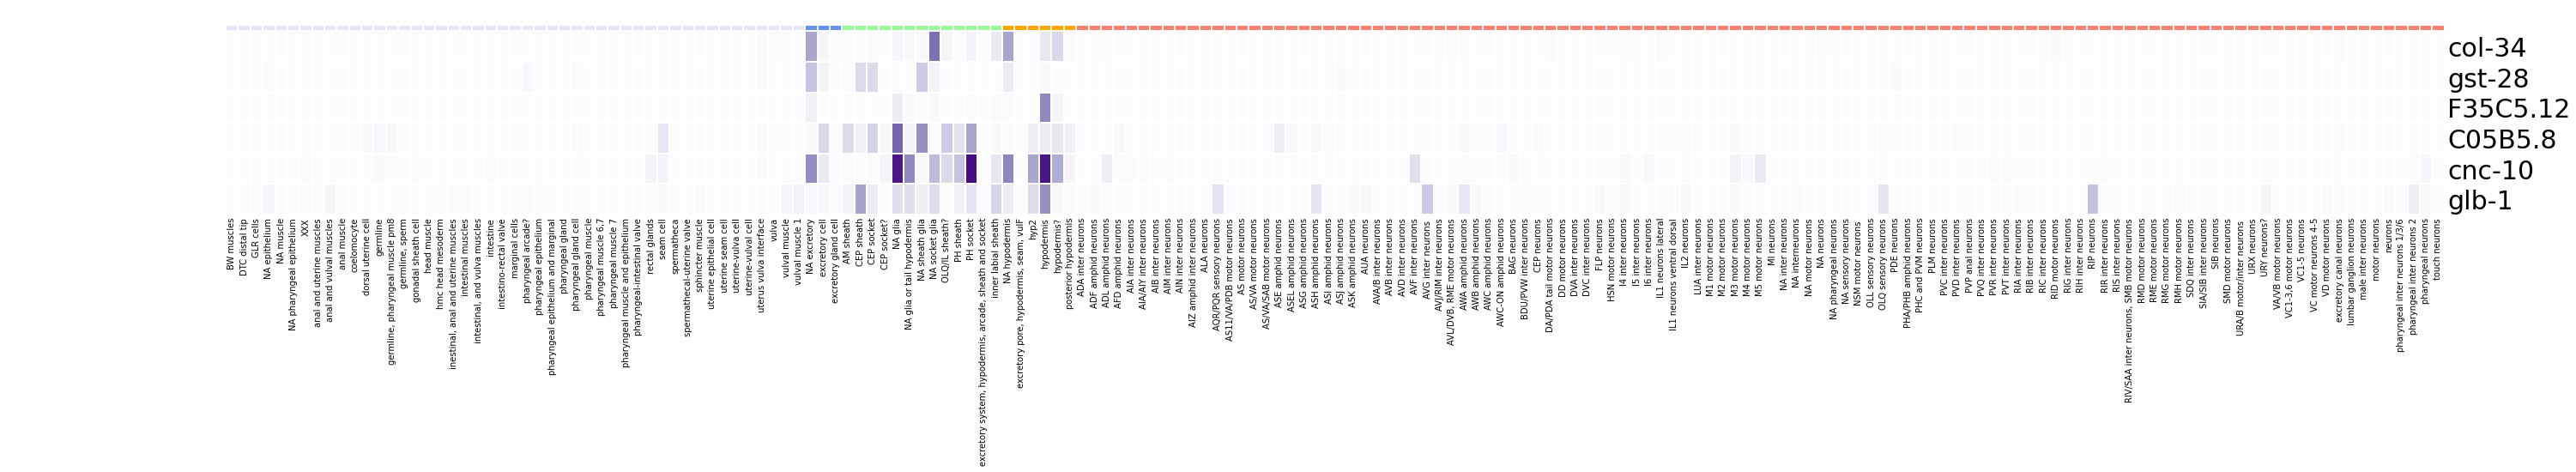

timepoint:d11


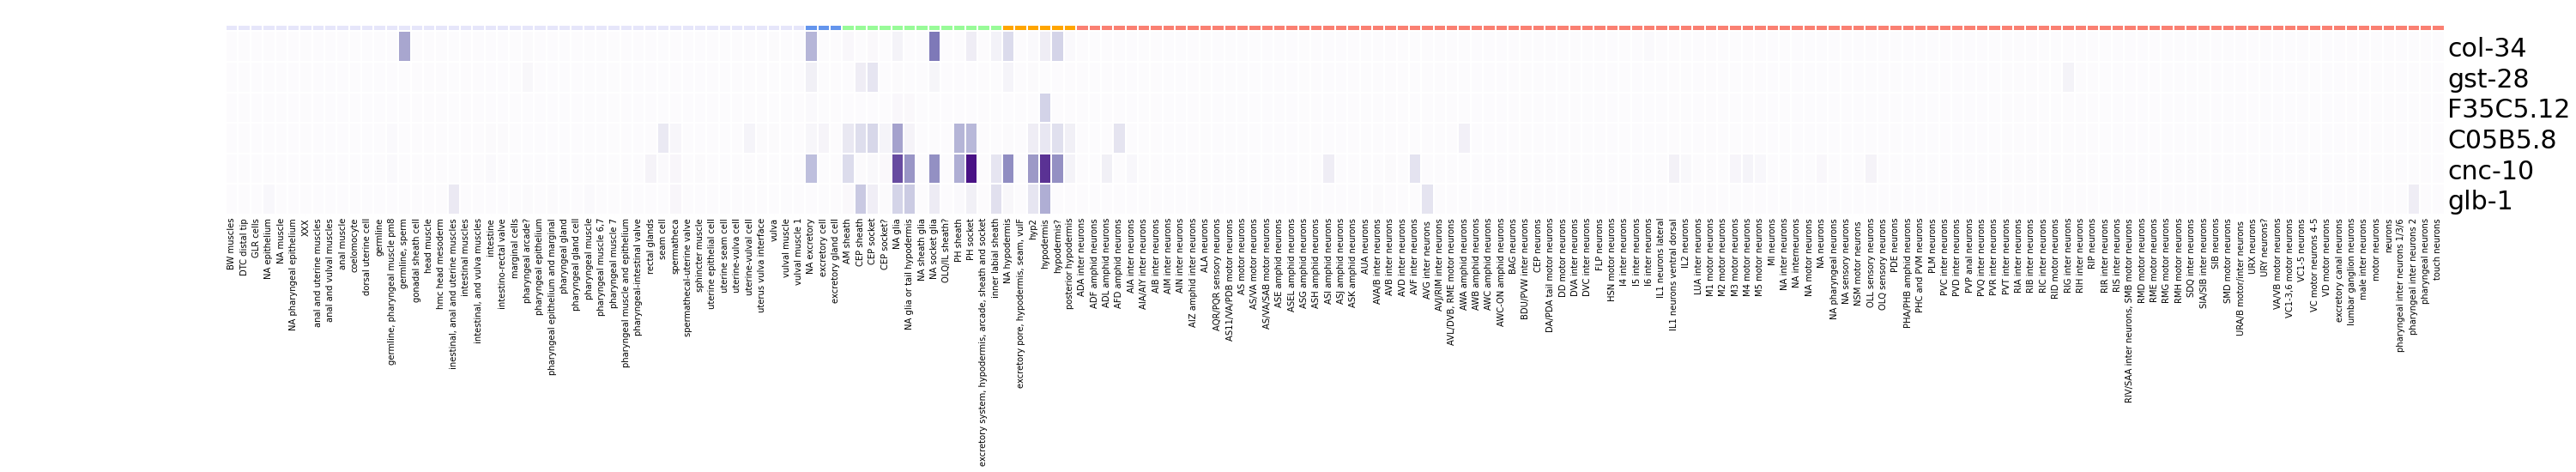

timepoint:d15


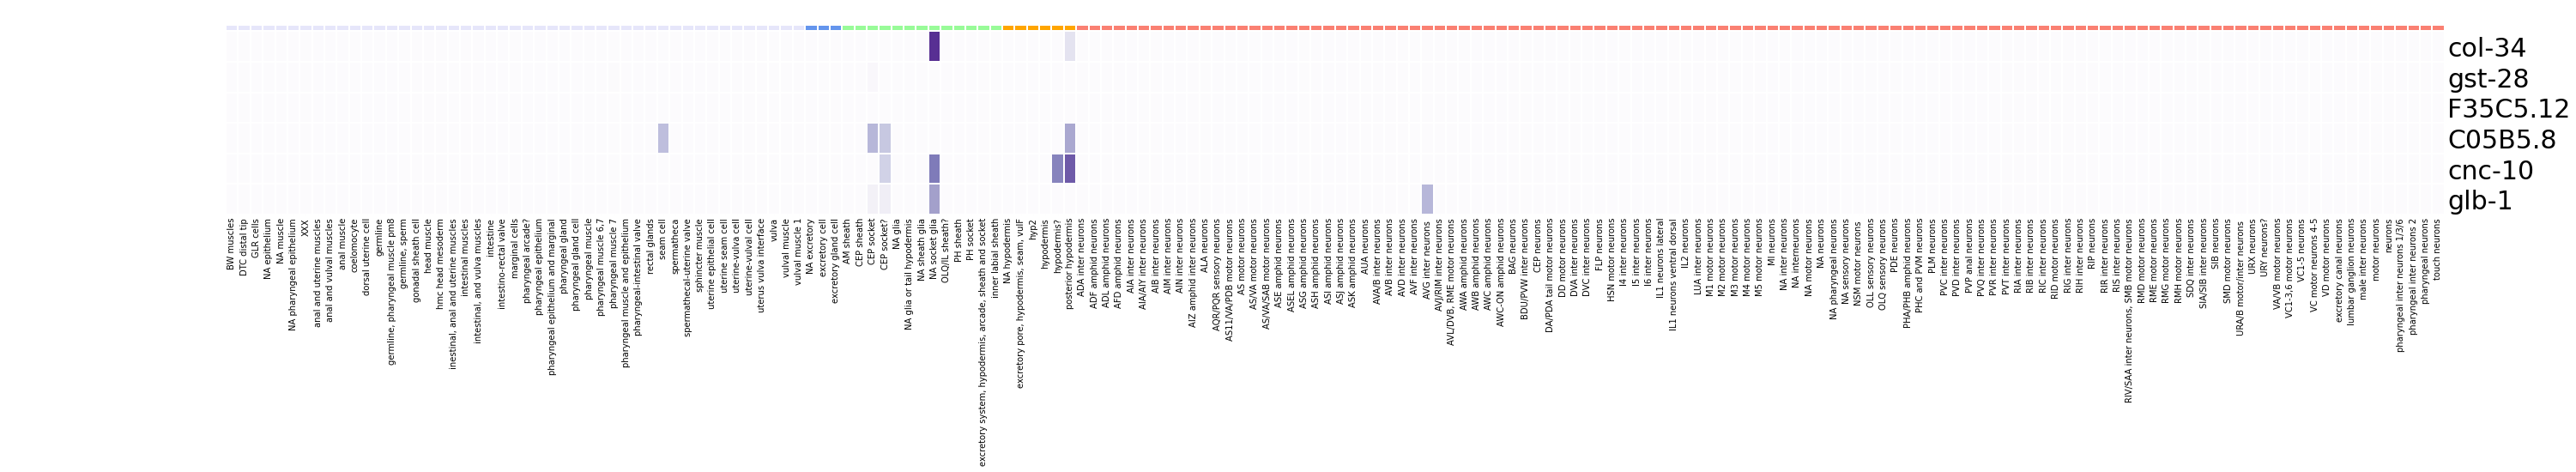

In [21]:
# plot the genes using function above -- for each time point
timepoints = concat_df.timepoint.unique()
for time in timepoints:
    print(f'timepoint:{time}')
    calico_plot_gene_sets(dataframe=concat_df, timepoint=time, category_order=category_order, 
                          save_path=f'figures/S4E_Calico_{time}_PanGlia')

# SFig 4F -- <i>ceh-27 & lim-7</i> Expression in IL/OLso Clusters

In [22]:
# subset the glia data to just the - Ilso and OLso clusters
adata_glia_sub = adata_glia[adata_glia.obs['Celltype'].isin(['ILso','OLso']),:].copy()

In [23]:
# create data frame to to plot
expression_mtx = pd.DataFrame(adata_glia_sub.layers['magic_imputed_postBC'].copy(), index=adata_glia_sub.obs_names, columns=adata_glia_sub.var_names)

# subset to transcription factor only genes
expression_mtx = expression_mtx.loc[:,adata_glia_sub.var.transcription_factors]

# add cluster labels
expression_mtx.loc[:,'clusters'] = adata_glia_sub.obs.loc[:,'Cluster_Celltype'].copy()

# get ceh-27 and lim-7
tf_sub = expression_mtx.loc[:,['ceh-27','lim-7','clusters']]

In [24]:
# order of the categories -- and set colors
order = ['7 - ILso', '11 - ILso', '28 - ILso', '8 - OLso', '9 - OLso', '12 - OLso']
color = ['#FBDBE4', '#B79661', '#F391BD', '#794B1E', '#2B3391', '#014E44']

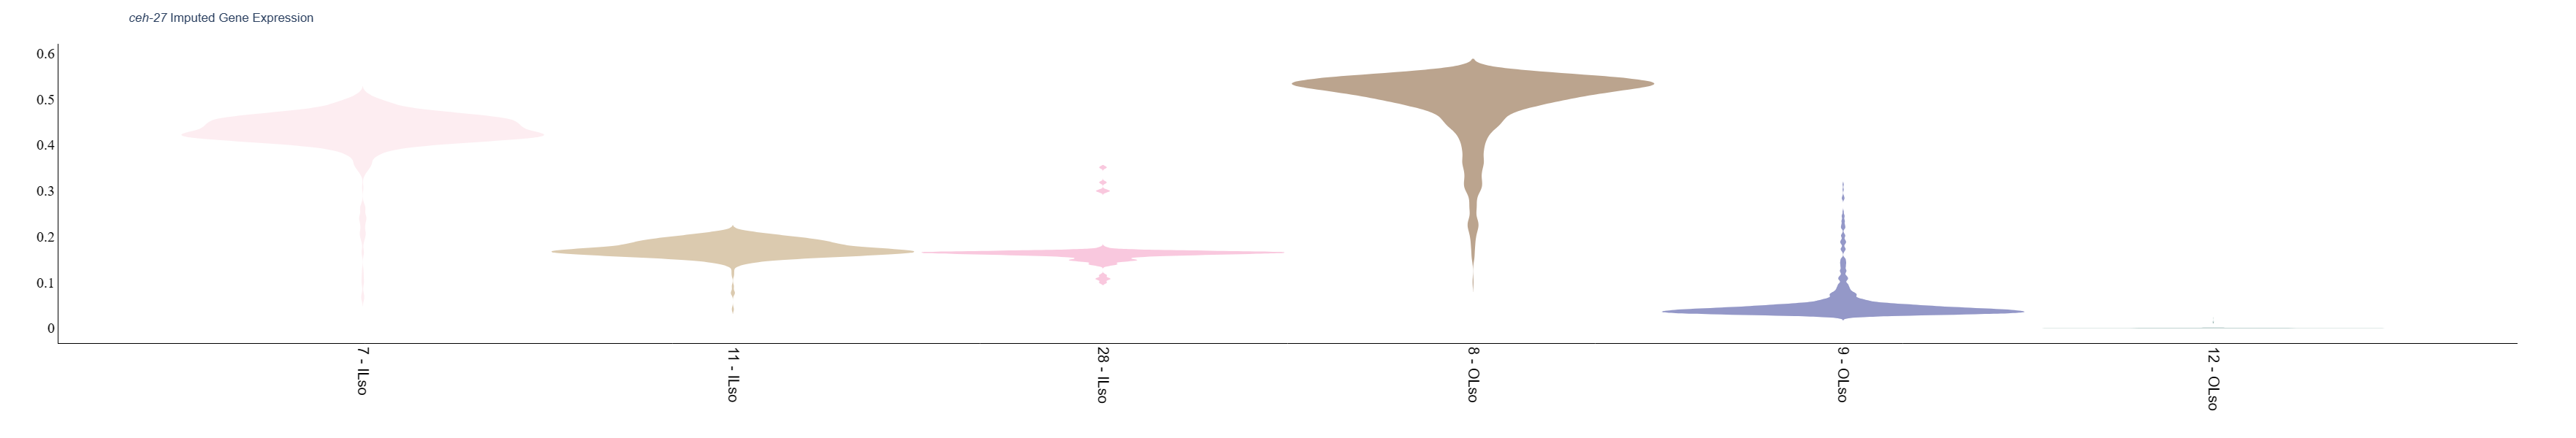

In [25]:
# plot violin plot distribution
fig = px.violin(tf_sub, x='clusters', y='ceh-27', color='clusters', points=False, color_discrete_map=dict(zip(order, color)))
fig.update_layout(
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',
    title='<i>ceh-27</i> Imputed Gene Expression',
    font=dict(family='Arial')
)
fig.update_traces(box_visible=False, meanline_visible=True,
                  opacity=1.0, marker_line_color='rgba(0,0,0,0)', line=dict(width=0),
                  marker_line_width=0.5, showlegend=False, width=0.98, marker_size=4)
fig.update_xaxes(title='',showgrid=False, tickangle=90, tickfont=dict(family='Arial', color='black', size=20),
                 showline=True, gridcolor='lightgray', categoryarray=order, linecolor='black')
fig.update_yaxes(title='', showgrid=True, tickfont=dict(family='Black', color='black', size=20),
                 showline=True, gridcolor=None, linecolor='black')
# fig.write_image(file='figures/ceh-27_expression_violin.svg', scale=3.0)
# fig.write_html('figures/ceh-27_expression_violin.html')
fig.show()

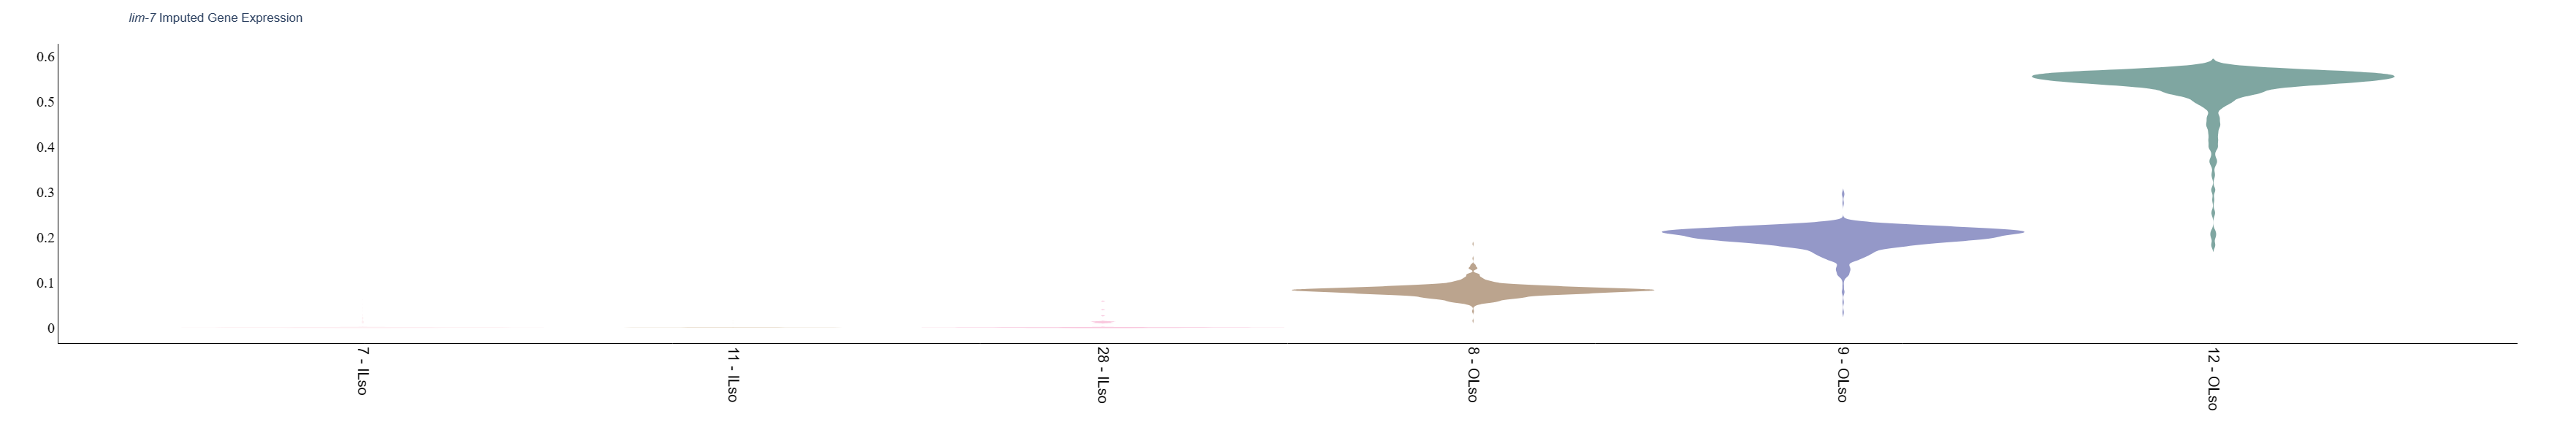

In [26]:
# plot violin plot distribution
fig = px.violin(tf_sub, x='clusters', y='lim-7', color='clusters', points=False, color_discrete_map=dict(zip(order, color)))
fig.update_layout(
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',
    title='<i>lim-7</i> Imputed Gene Expression',
    font=dict(family='Arial'),
)
fig.update_traces(box_visible=False, meanline_visible=True,
                  opacity=1.0, marker_line_color='rgba(0,0,0,0)', line=dict(width=0),
                  marker_line_width=0.5, showlegend=False, width=0.98, marker_size=4)
fig.update_xaxes(title='',showgrid=False, tickangle=90, tickfont=dict(family='Arial', color='black', size=20),
                 showline=True, gridcolor='lightgray', categoryarray=order, linecolor='black')
fig.update_yaxes(title='', showgrid=True, tickfont=dict(family='Black', color='black', size=20),
                 showline=True, gridcolor=None, linecolor='black')
fig.show()

# SFig 4G -- <i>irk-3</i> Gene Expression

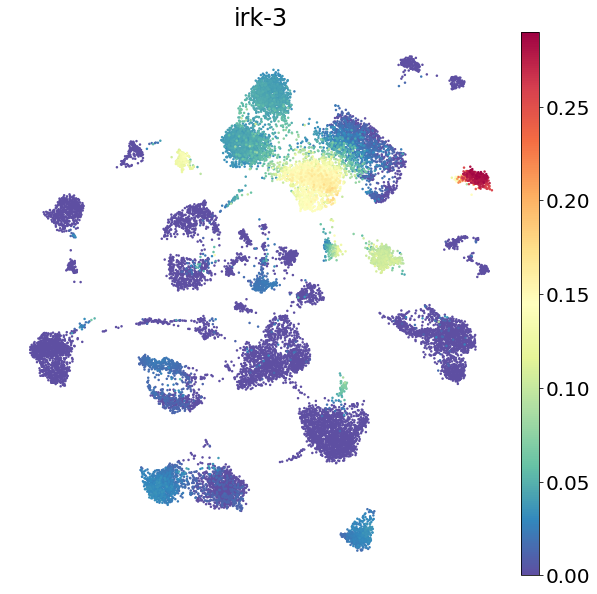

In [27]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size': 20.0}):
    PLOT_GENES = ['irk-3'] 
    for gene in PLOT_GENES:
        sc.pl.umap(
            adata_glia,
            color=[gene],
            frameon=False,
            size=DOT_SIZE,
            layer='magic_imputed_postBC',
        )